In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
import joblib as jl
import warnings as war
war.filterwarnings('ignore')

In [2]:
df = pd.read_csv('The_Cancer_data_1500_V2.csv')
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [3]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [5]:
df.shape

(1500, 9)

In [6]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [7]:
print("No of Duplicates:",df.duplicated().sum())

No of Duplicates: 0


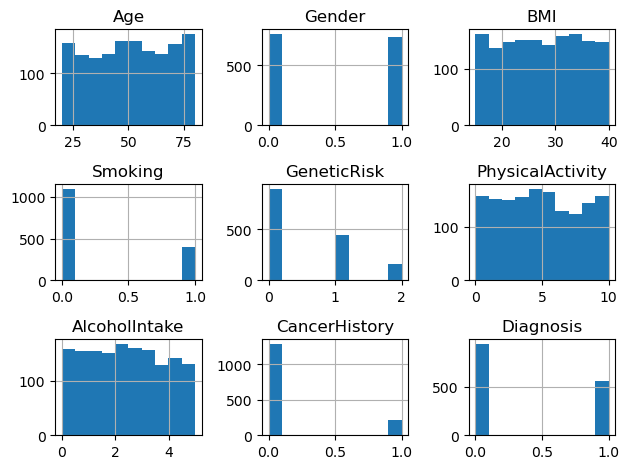

In [8]:
df.hist()
plt.tight_layout()

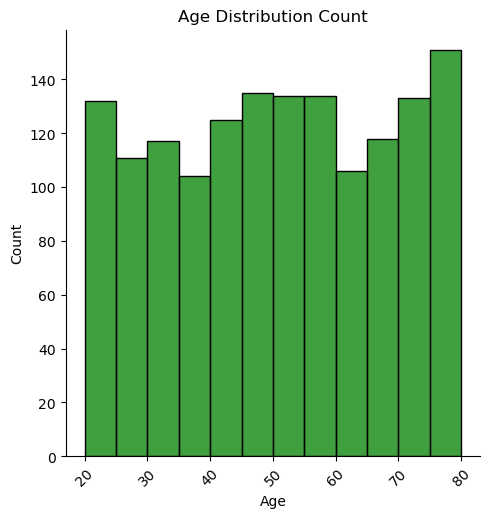

In [9]:
sns.displot(df,x='Age',color='Green')
plt.title('Age Distribution Count')
plt.xticks(rotation=45)
plt.show()

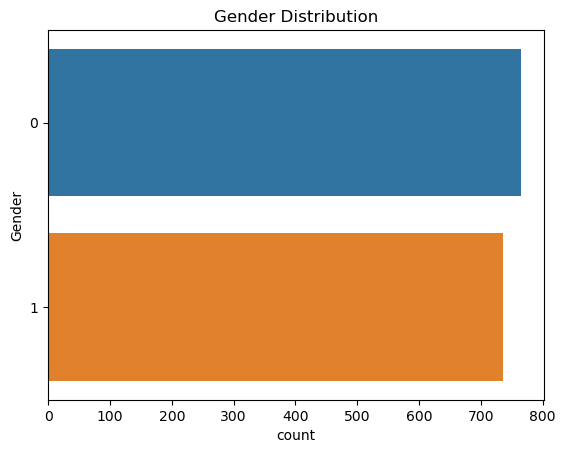

In [10]:
sns.countplot(y='Gender',data=df)
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Cancer Percentage Rate')

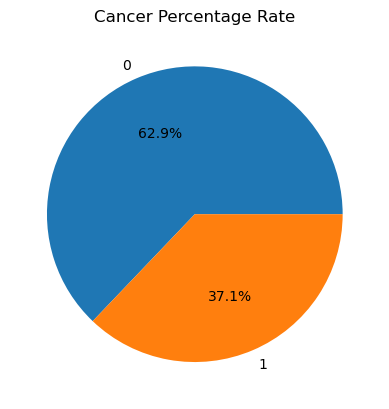

In [11]:
plt.pie(df['Diagnosis'].value_counts(),labels=df['Diagnosis'].value_counts().index,autopct='%1.1f%%')
plt.title("Cancer Percentage Rate")

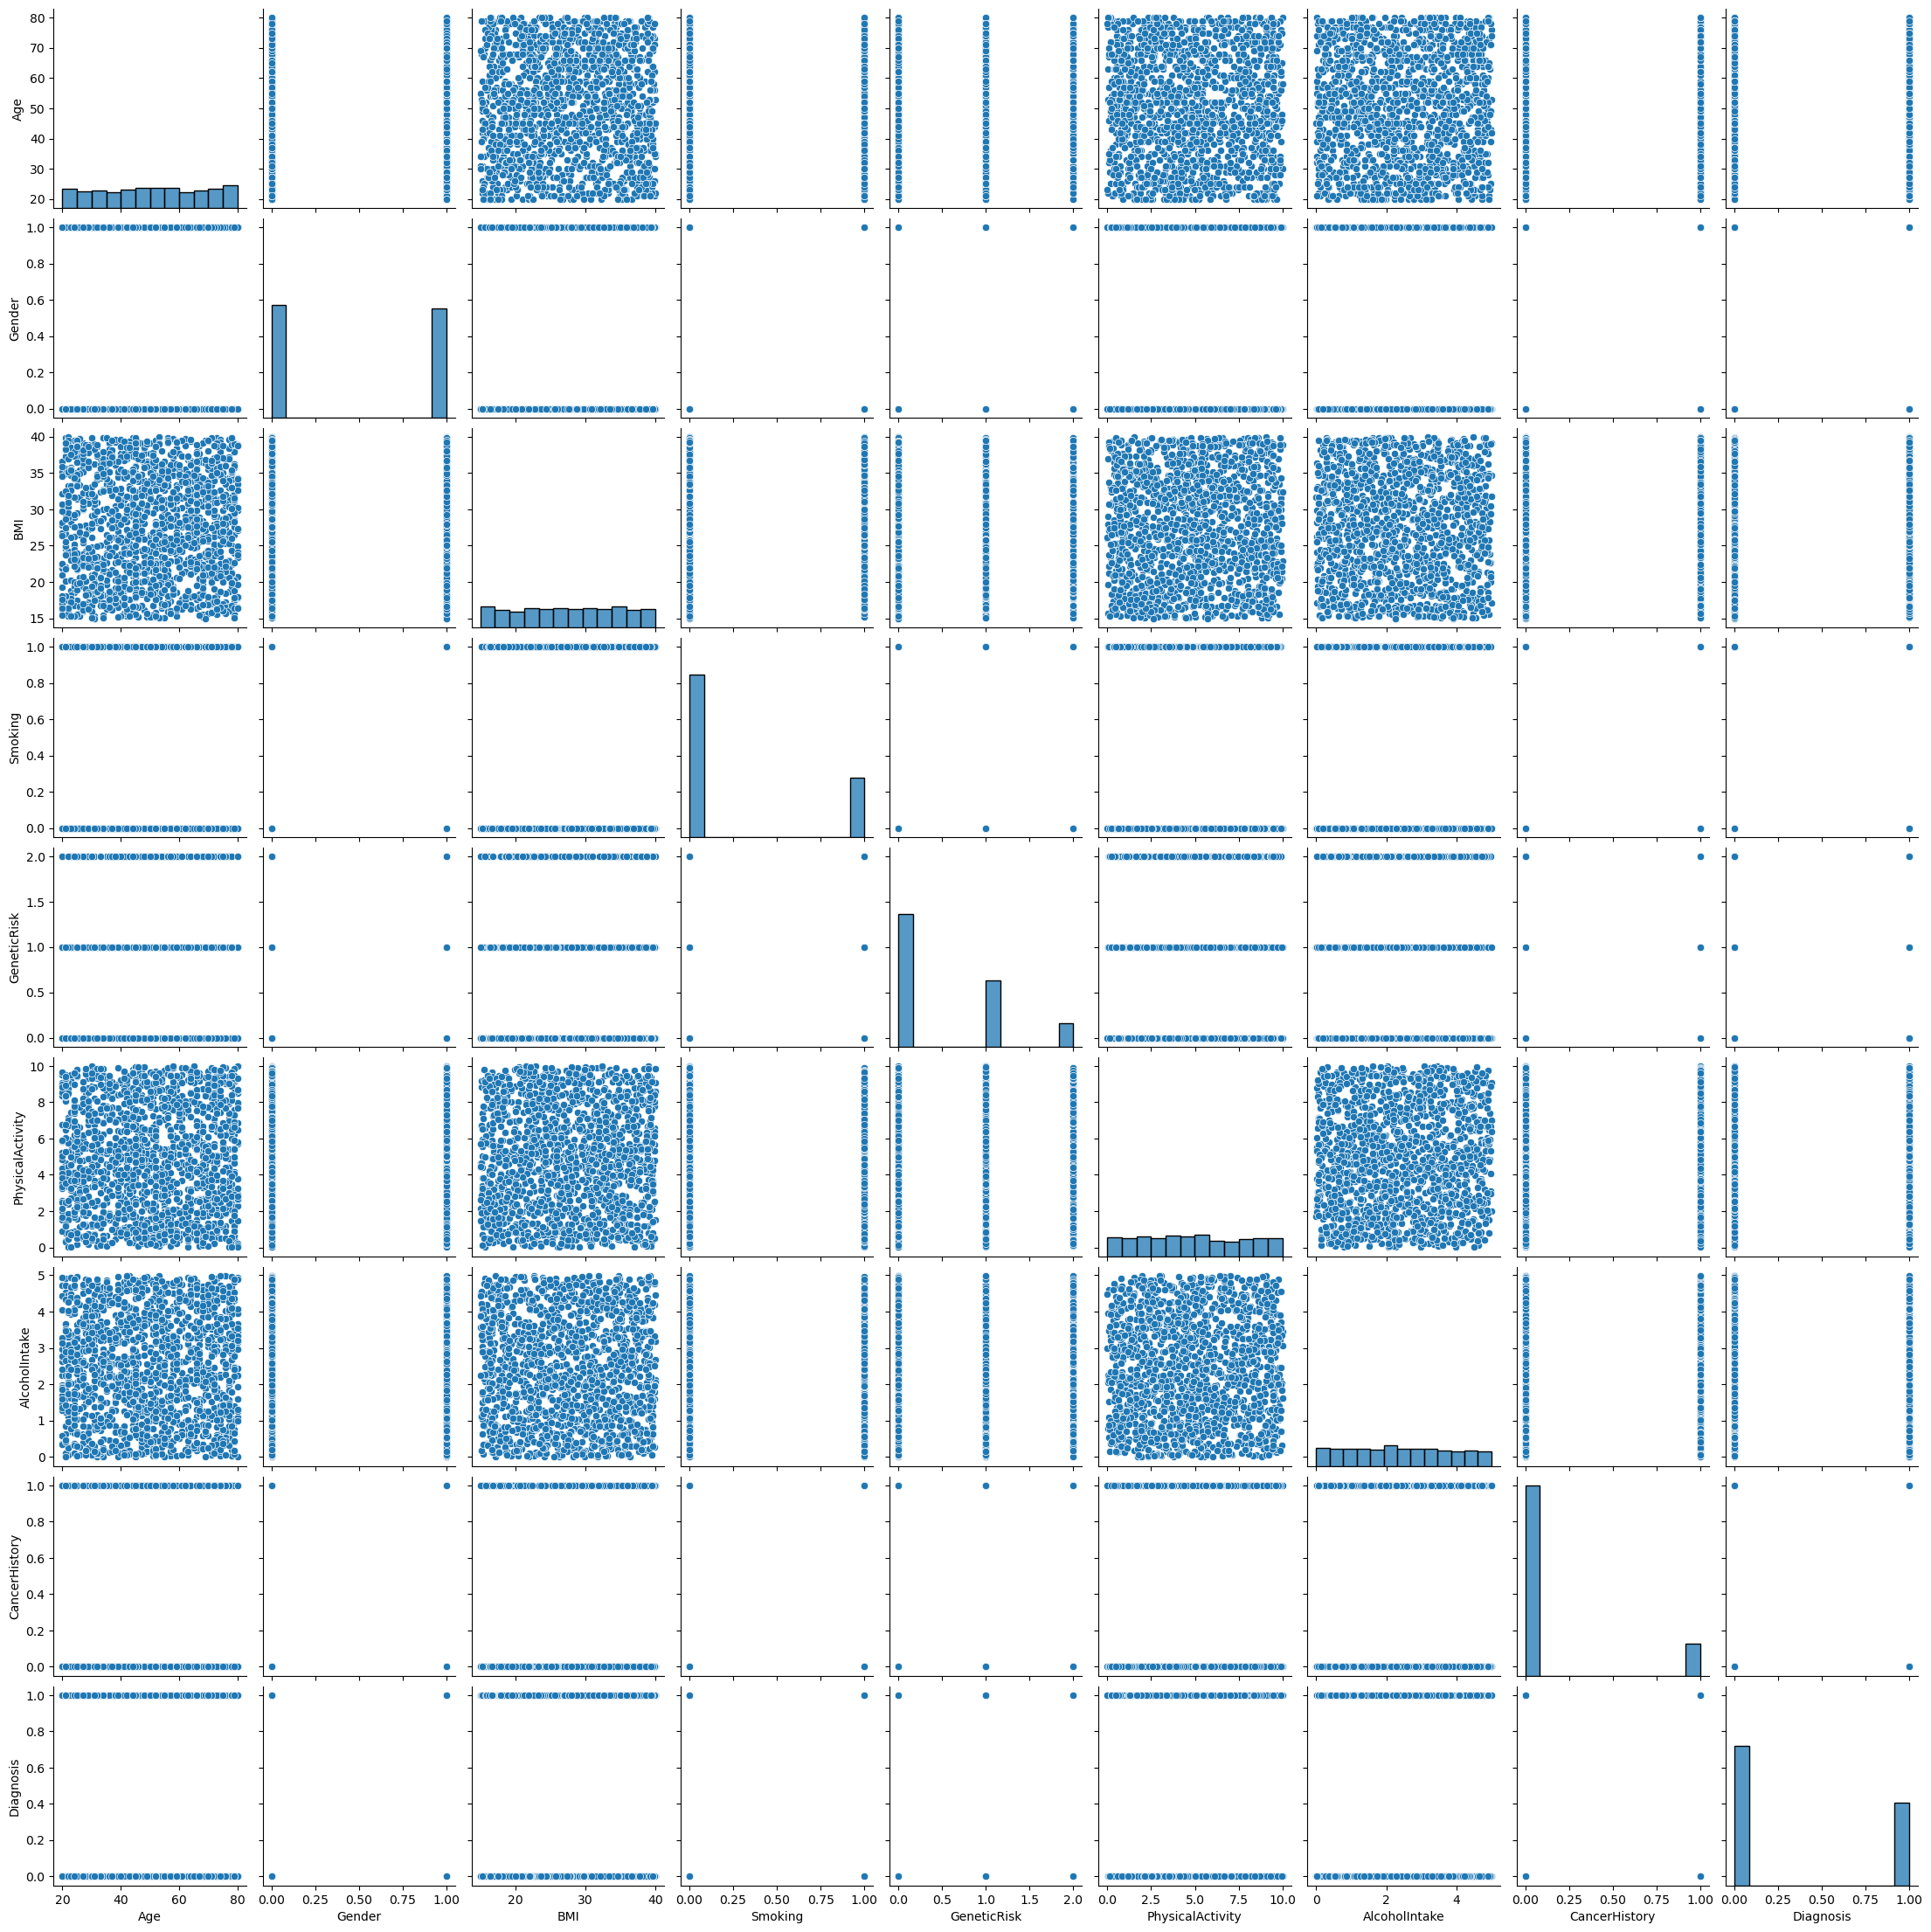

In [12]:
sns.pairplot(df)

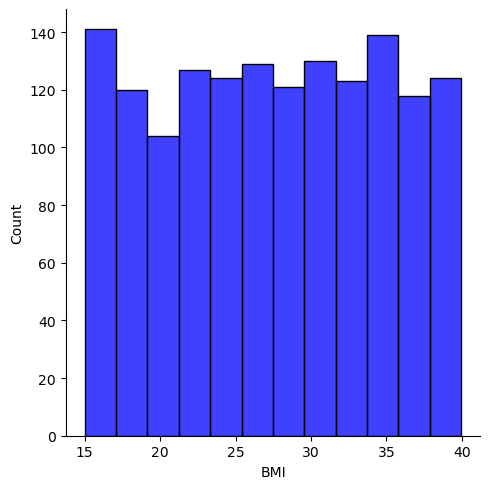

In [13]:
sns.displot(df,x='BMI',color='Blue')

In [14]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


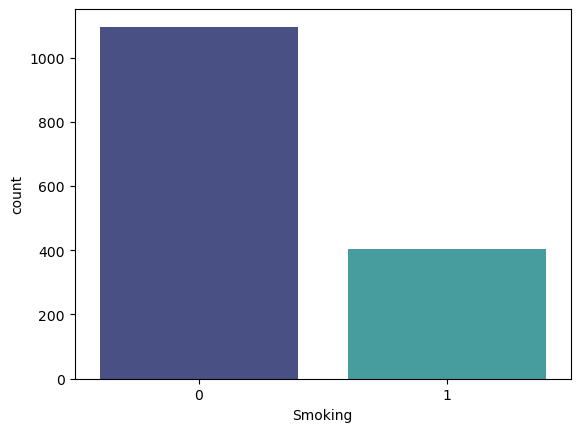

In [15]:
sns.countplot(df,x='Smoking',palette='mako')
plt.show()

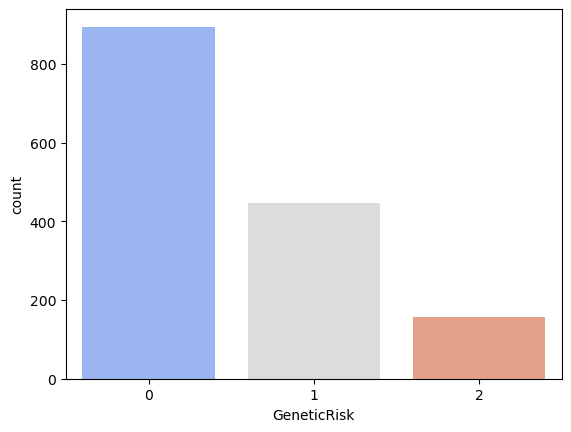

In [16]:
sns.countplot(df,x='GeneticRisk',palette='coolwarm')
plt.show()

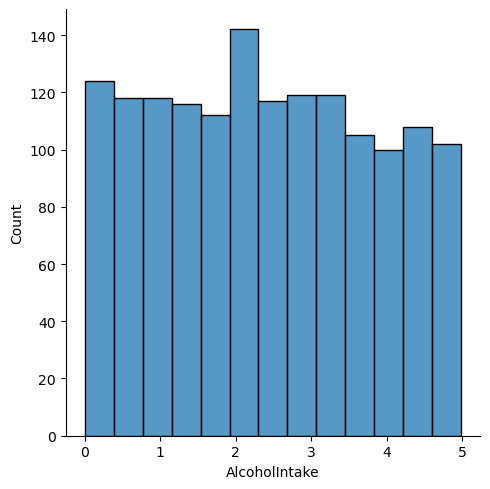

In [17]:
sns.displot(df,x='AlcoholIntake',palette='coolwarm')
plt.show()

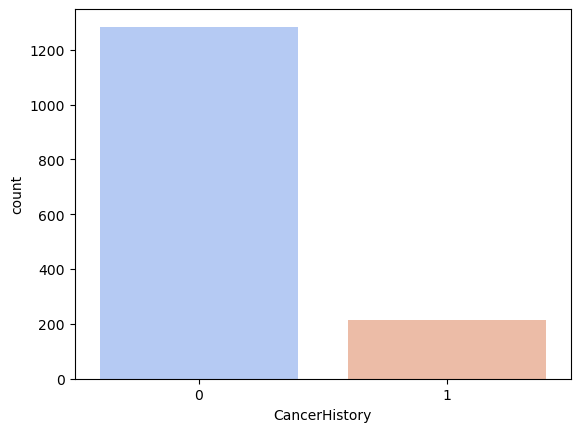

In [18]:
sns.countplot(df,x='CancerHistory',palette='coolwarm')
plt.show()

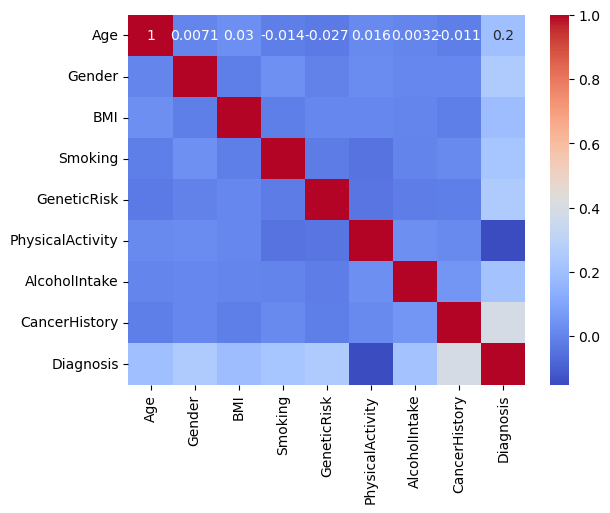

<Figure size 1200x700 with 0 Axes>

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.figure(figsize=(12,7))
plt.tight_layout()

In [20]:
x = df.drop(columns='Diagnosis')
y = df['Diagnosis']

In [21]:
x

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0
...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0
1496,31,0,33.447125,0,1,1.668297,2.280636,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0
1498,55,0,25.568216,0,0,7.795317,1.986138,1


In [22]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
Rmodel = RandomForestClassifier(n_estimators=100)
Rmodel.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
Rpredict = Rmodel.predict(x_test)
Rpredict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], d

In [26]:
rcm = classification_report(y_test,Rpredict)
print("\nClassification Report:\n",rcm)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       199
           1       0.94      0.86      0.90       101

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300



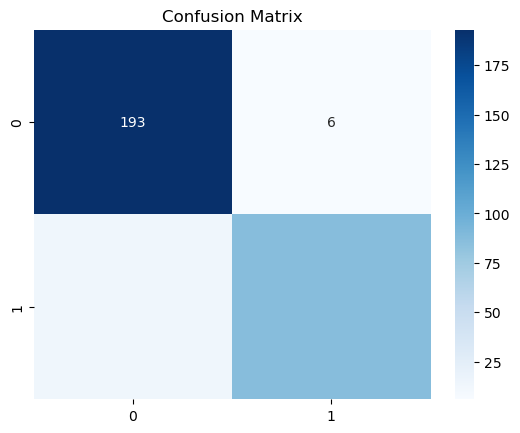

In [27]:
RCM = confusion_matrix(y_test,Rpredict)
plt.title("Confusion Matrix")
sns.heatmap(RCM,annot=True,fmt='d',cmap='Blues')
plt.show()

In [28]:
Amodel = AdaBoostClassifier(n_estimators=100,random_state=42)
Amodel.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [29]:
Apredict = Amodel.predict(x_test)
Apredict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], d

In [30]:
acm = classification_report(y_test,Apredict)
print("\nClassification Report:\n",acm)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       199
           1       0.89      0.87      0.88       101

    accuracy                           0.92       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.92      0.92       300



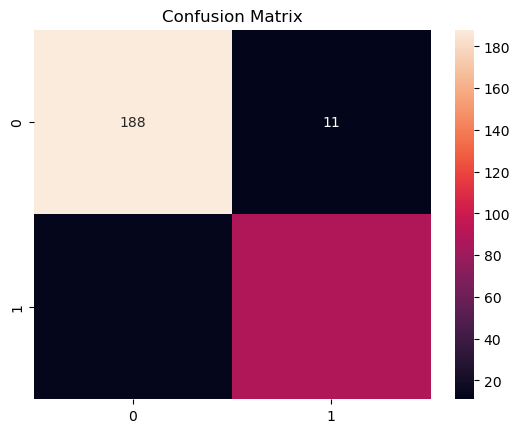

In [31]:
ACM = confusion_matrix(y_test,Apredict)
plt.title("Confusion Matrix")
sns.heatmap(ACM,annot=True,fmt='d')
plt.show()

In [32]:
xmodel = XGBClassifier(n_estimators=100,booster='gbtree')
xmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
xpredict = xmodel.predict(x_test)
xpredict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [34]:
xcm = classification_report(y_test,xpredict)
print("\nClassification Report:\n",xcm)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       199
           1       0.93      0.88      0.90       101

    accuracy                           0.94       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.94      0.94      0.94       300



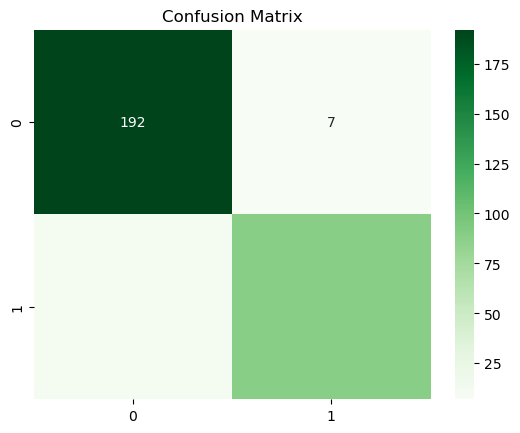

In [35]:
XCM = confusion_matrix(y_test,xpredict)
plt.title("Confusion Matrix")
sns.heatmap(XCM,annot=True,fmt='d',cmap='Greens')
plt.show()

In [36]:
Gmodel = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)
Gmodel.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [37]:
Gpredict = Gmodel.predict(x_test)
Gpredict

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], d

In [38]:
gcm = classification_report(y_test,Gpredict)
print("\nClassification Report:\n",gcm)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       199
           1       0.89      0.91      0.90       101

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



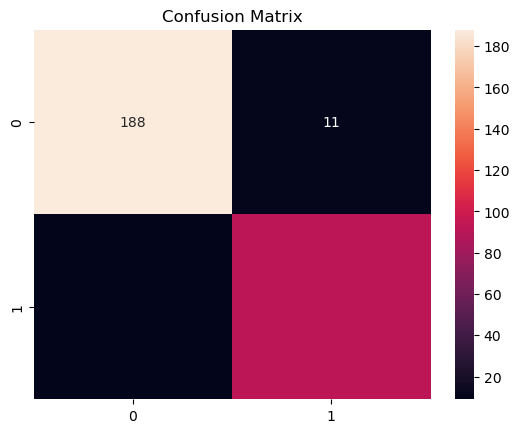

In [39]:
GCM = confusion_matrix(y_test,Gpredict)
plt.title("Confusion Matrix")
sns.heatmap(GCM,annot=True,fmt='d')
plt.show()

In [40]:
Kmodel = KNeighborsClassifier(n_neighbors=3)
Kmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
Kpredict = Kmodel.predict(x_test)
Kpredict

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], d

In [42]:
kcm = classification_report(y_test,Kpredict)
print("\nClassification Report:\n",kcm)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       199
           1       0.57      0.50      0.53       101

    accuracy                           0.71       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.70      0.71      0.70       300



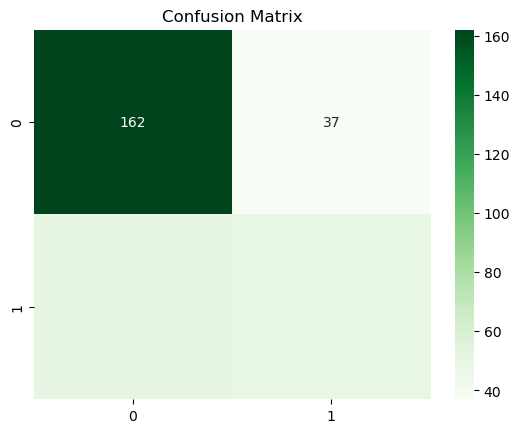

In [43]:
KCM = confusion_matrix(y_test,Kpredict)
plt.title("Confusion Matrix")
sns.heatmap(KCM,annot=True,fmt='d',cmap='Greens')
plt.show()

In [44]:
from sklearn.svm import SVC
Smodel = SVC()
Smodel.fit(x_train,y_train)

SVC()

In [45]:
Spredict = Smodel.predict(x_test)
Spredict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], d

In [46]:
scm = classification_report(y_test,Spredict)
print("\nClassification Report:\n",scm)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       199
           1       0.66      0.31      0.42       101

    accuracy                           0.71       300
   macro avg       0.69      0.61      0.61       300
weighted avg       0.70      0.71      0.68       300



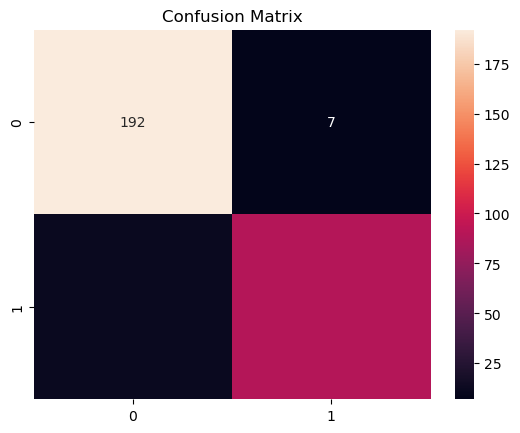

In [47]:
SCM = confusion_matrix(y_test,Spredict)
plt.title("Confusion Matrix")
sns.heatmap(XCM,annot=True,fmt='d')
plt.show()

In [51]:
Models ={
    'RandomForestClassifier':Rmodel,
    'AdaBoostClassifier':Amodel,
    'XGBClassifier':xmodel,
    'GradientBoostingClassifier':Gmodel,
    'KNeighborsClassifier':Kmodel,
    'SVC':Smodel
}

jl.dump(Models,'Cancer_pred_Models.pkl',protocol=4)
print("Saved Successfully")

Saved Successfully


In [52]:
model = jl.load('Cancer_pred_Models.pkl')
model

{'RandomForestClassifier': RandomForestClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, random_state=42),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=200),
 '

In [55]:
import joblib

# Load the model
model = joblib.load('Cancer_pred_Models.pkl')

# Check the scikit-learn version in the model metadata
if hasattr(model, '_sklearn_version'):
    print("Scikit-learn version used to train:", model._sklearn_version)
else:
    print("Version information not available.")


Version information not available.


In [57]:
sklearn --version

NameError: name 'sklearn' is not defined